Does higher share of urban population lead to larger road mortality?

higher urban population => more cars and bigger density => more deaths on the roads

In [1]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import sys
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import seaborn as sns

In [2]:
#read the data
urban_population = pd.read_csv("3c9312b9-fd8b-4091-93a2-67e01fb35046_Data.csv")
road_incidents = pd.read_csv("death-rates-road-incidents.csv")
print(road_incidents.head())

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)  
0                                          52.262263                  
1                                          52.597034                  
2                                          52.484181                  
3                                          54.153250                  
4                                          57.190504                  


In [3]:
print(urban_population.head(10))

   Time Time Code         Country Name Country Code  \
0  1992    YR1992          Afghanistan          AFG   
1  1992    YR1992              Albania          ALB   
2  1992    YR1992              Algeria          DZA   
3  1992    YR1992       American Samoa          ASM   
4  1992    YR1992              Andorra          AND   
5  1992    YR1992               Angola          AGO   
6  1992    YR1992  Antigua and Barbuda          ATG   
7  1992    YR1992            Argentina          ARG   
8  1992    YR1992              Armenia          ARM   
9  1992    YR1992                Aruba          ABW   

  Urban population [SP.URB.TOTL]  \
0                        3093388   
1                        1209490   
2                       14502589   
3                          41308   
4                          55546   
5                        5067883   
6                          22620   
7                       29352243   
8                        2302487   
9                          34116  

In [4]:
urban_population.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Urban population [SP.URB.TOTL]',
       'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]',
       'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]'],
      dtype='object')

In [5]:
road_incidents.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [6]:
cols_to_drop = ['Time Code']
urban_population.drop(columns=cols_to_drop, axis=1, inplace=True)

In [7]:
urban_population.head()

,Time,Country Name,Country Code,Urban population [SP.URB.TOTL],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],"GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]"
0,1992,Afghanistan,AFG,3093388,21.355,..
1,1992,Albania,ALB,1209490,37.249,3275.44433583801
2,1992,Algeria,DZA,14502589,53.657,8383.77024779121
3,1992,American Samoa,ASM,41308,82.789,..
4,1992,Andorra,AND,55546,94.324,..


In [8]:
cols = {'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]':'urbpop',
        'Urban population [SP.URB.TOTL]':'urbpoptotal',
        'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]':'gdppc',
          'Time':'year',
        'Country Name':'country',
           'Country Code':'ccode'}
urban_population.rename(columns=cols, inplace=True)

In [9]:
urban_population.columns

Index(['year', 'country', 'ccode', 'urbpoptotal', 'urbpop', 'gdppc'], dtype='object')

In [10]:
road_incidents.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [11]:
cols = {'Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)':'incidents',
          'Year':'year',
        'Entity':'country',
           'Code':'ccode'}
road_incidents.rename(columns=cols, inplace=True)

In [12]:
road_incidents.columns

Index(['country', 'ccode', 'year', 'incidents'], dtype='object')

In [13]:
urban_population.tail(10)

,year,country,ccode,urbpoptotal,urbpop,gdppc
5854,2018,Virgin Islands (U.S.),VIR,102422,95.721,..
5855,2018,West Bank and Gaza,PSE,3479999,76.164,6318.21006766832
5856,2018,"Yemen, Rep.",YEM,10442489,36.642,..
5857,2018,Zambia,ZMB,7551686,43.521,3521.52014445306
5858,2018,Zimbabwe,ZWE,4650663,32.209,3130.02950059825
5859,NaN,NaN,NaN,NaN,NaN,NaN
5860,NaN,NaN,NaN,NaN,NaN,NaN
5861,NaN,NaN,NaN,NaN,NaN,NaN
5862,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN
5863,Last Updated: 03/19/2021,NaN,NaN,NaN,NaN,NaN


In [14]:
road_incidents.tail(10)

,country,ccode,year,incidents
6458,Zimbabwe,ZWE,2008,34.054126
6459,Zimbabwe,ZWE,2009,33.574161
6460,Zimbabwe,ZWE,2010,32.618256
6461,Zimbabwe,ZWE,2011,31.095035
6462,Zimbabwe,ZWE,2012,29.621973
6463,Zimbabwe,ZWE,2013,28.430509
6464,Zimbabwe,ZWE,2014,27.365695
6465,Zimbabwe,ZWE,2015,26.684043
6466,Zimbabwe,ZWE,2016,26.051148
6467,Zimbabwe,ZWE,2017,25.377666


In [15]:
#dealing with nan

In [16]:
urban_population.replace('..',np.NaN,inplace=True)

In [17]:
urban_population.isnull().sum()

year             3
country          5
ccode            5
urbpoptotal     69
urbpop          66
gdppc          848
dtype: int64

In [18]:
urban_population.groupby('country').agg(lambda x: x.isnull().sum()).sort_values(['urbpop']+['gdppc']+['urbpoptotal'],ascending=False).head(60)

,year,ccode,urbpoptotal,urbpop,gdppc
country,,,,,
St. Martin (French part),0,0,27,27,27
Kosovo,0,0,27,27,8
Eritrea,0,0,7,7,27
American Samoa,0,0,0,0,27
Andorra,0,0,0,0,27
British Virgin Islands,0,0,0,0,27
Channel Islands,0,0,0,0,27
Cuba,0,0,0,0,27
Faroe Islands,0,0,0,0,27


In [19]:
#dropping Kosovo, St Martin and Eritrea
cond1=urban_population.country != 'Kosovo'
cond2=urban_population.country != 'St. Martin (French part)'
cond3=urban_population.country != 'Eritrea'
condition=cond1 & cond2 & cond3
urban_population = urban_population[condition]

In [20]:
urban_population=urban_population.dropna(axis=0,thresh=6)

In [21]:
urban_population.head()

,year,country,ccode,urbpoptotal,urbpop,gdppc
1,1992,Albania,ALB,1209490,37.249,3275.44433583801
2,1992,Algeria,DZA,14502589,53.657,8383.77024779121
5,1992,Angola,AGO,5067883,40.039,5148.25282361678
6,1992,Antigua and Barbuda,ATG,22620,35.085,15497.4647441974
7,1992,Argentina,ARG,29352243,87.542,16209.3230774449


In [22]:
urban_population.groupby('country').agg(lambda x: x.isnull().sum()).sort_values(['urbpop']+['gdppc'],ascending=False).head(20)

,year,ccode,urbpoptotal,urbpop,gdppc
country,,,,,
Afghanistan,0,0,0,0,0
Albania,0,0,0,0,0
Algeria,0,0,0,0,0
Angola,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0
Argentina,0,0,0,0,0
Armenia,0,0,0,0,0
Aruba,0,0,0,0,0
Australia,0,0,0,0,0


In [23]:
urban_population.isnull().sum()

year           0
country        0
ccode          0
urbpoptotal    0
urbpop         0
gdppc          0
dtype: int64

In [24]:
urban_population.year=pd.to_numeric(urban_population.year)
urban_population.urbpop=pd.to_numeric(urban_population.urbpop)
urban_population.gdppc=pd.to_numeric(urban_population.gdppc)
urban_population.urbpoptotal=pd.to_numeric(urban_population.urbpoptotal)

In [25]:
for i in urban_population.columns:
    print(i,type(urban_population.loc[1,i]))

year <class 'numpy.int64'>
country <class 'str'>
ccode <class 'str'>
urbpoptotal <class 'numpy.int64'>
urbpop <class 'numpy.float64'>
gdppc <class 'numpy.float64'>


In [26]:
road_incidents.replace('..',np.NaN,inplace=True)

In [27]:
for i in road_incidents.columns:
    print(i,type(road_incidents.loc[2,i]))

country <class 'str'>
ccode <class 'str'>
year <class 'numpy.int64'>
incidents <class 'numpy.float64'>


In [28]:
road_incidents.isnull().sum()

country        0
ccode        980
year           0
incidents      0
dtype: int64

In [29]:
road_incidents.groupby('country').agg(lambda x: x.isnull().sum()).sort_values(['ccode'],ascending=False).head(20)

,ccode,year,incidents
country,,,
Eastern Sub-Saharan Africa,28,0,0.0
North Africa and Middle East,28,0,0.0
Northern Ireland,28,0,0.0
Central Asia,28,0,0.0
Central Europe,28,0,0.0
"Central Europe, Eastern Europe, and Central Asia",28,0,0.0
Central Latin America,28,0,0.0
Central Sub-Saharan Africa,28,0,0.0
Sub-Saharan Africa,28,0,0.0


In [30]:
frames=[urban_population,road_incidents]
data=pd.merge(urban_population,road_incidents,on=['ccode','year'],how='inner')

In [31]:
data.head()

,year,country_x,ccode,urbpoptotal,urbpop,gdppc,country_y,incidents
0,1992,Albania,ALB,1209490,37.249,3275.444336,Albania,12.885809
1,1992,Algeria,DZA,14502589,53.657,8383.770248,Algeria,33.742905
2,1992,Angola,AGO,5067883,40.039,5148.252824,Angola,57.157698
3,1992,Antigua and Barbuda,ATG,22620,35.085,15497.464744,Antigua and Barbuda,10.905876
4,1992,Argentina,ARG,29352243,87.542,16209.323077,Argentina,14.077096


In [32]:
data.drop(columns='country_y',inplace=True,axis=1)

In [33]:
cols = {'country_x':'country'}
data.rename(columns=cols, inplace=True)

In [34]:
data.tail()

,year,country,ccode,urbpoptotal,urbpop,gdppc,incidents
4572,2017,Vanuatu,VUT,71843,25.163,3116.645194,20.961100
4573,2017,Vietnam,VNM,33310316,35.213,7155.745829,21.430619
4574,2017,West Bank and Gaza,PSE,3380930,75.894,6401.740891,8.547896
4575,2017,Zambia,ZMB,7243041,42.976,3485.005238,19.812104
4576,2017,Zimbabwe,ZWE,4589499,32.237,3028.245976,25.377666


In [35]:
data.isnull().sum()

year           0
country        0
ccode          0
urbpoptotal    0
urbpop         0
gdppc          0
incidents      0
dtype: int64

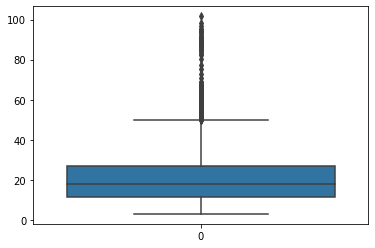

In [36]:
sns.boxplot(data=data.incidents)

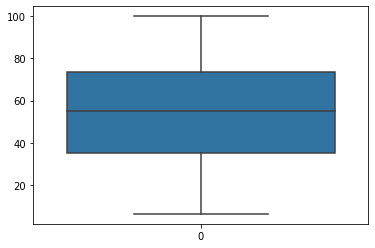

In [37]:
sns.boxplot(data=data.urbpop)

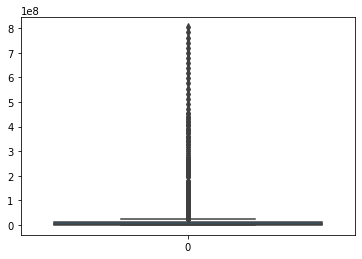

In [40]:
sns.boxplot(data=data.urbpoptotal)

In [38]:
data.country=data.country.astype("category")
data.year=data.year.astype("category")
data.year=data.year.astype("category")

In [39]:
countries_grouped = data.groupby("country")

In [44]:
data["lngdppc"] = countries_grouped["gdppc"].transform(np.log)
data["lnurbpoptotal"] = countries_grouped["urbpoptotal"].transform(np.log)
data["d_lngdppc"] = countries_grouped["lngdppc"].transform("diff")
data["d_lnurbpoptotal"] = countries_grouped["lnurbpoptotal"].transform("diff")
data["d_incid"] = countries_grouped["incidents"].transform("diff")
data["d_urbpop"] = countries_grouped["urbpop"].transform("diff")

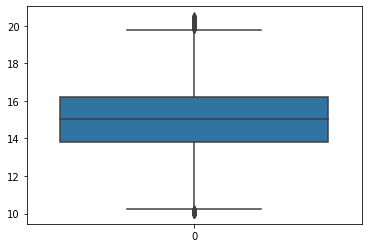

In [45]:
sns.boxplot(data=data.lnurbpoptotal)

In [46]:
data.head()

,year,country,ccode,urbpoptotal,urbpop,gdppc,incidents,lngdppc,lnurbpoptotal,d_lngdppc,d_incid,d_urbpop,d_lnurbpoptotal
0,1992,Albania,ALB,1209490,37.249,3275.444336,12.885809,8.094209,14.005709,NaN,NaN,NaN,NaN
1,1992,Algeria,DZA,14502589,53.657,8383.770248,33.742905,9.034053,16.489838,NaN,NaN,NaN,NaN
2,1992,Angola,AGO,5067883,40.039,5148.252824,57.157698,8.546413,15.438434,NaN,NaN,NaN,NaN
3,1992,Antigua and Barbuda,ATG,22620,35.085,15497.464744,10.905876,9.648432,10.026590,NaN,NaN,NaN,NaN
4,1992,Argentina,ARG,29352243,87.542,16209.323077,14.077096,9.693342,17.194880,NaN,NaN,NaN,NaN


In [47]:
model = smf.wls("incidents ~ urbpop + lngdppc + year", data)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data.loc[model.data.row_labels, "country"]},
)
fd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.209
Model:                            WLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     14.71
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.33e-32
Time:                        20:00:04   Log-Likelihood:                -17889.
No. Observations:                4577   AIC:                         3.583e+04
Df Residuals:                    4549   BIC:                         3.601e+04
Df Model:                          27                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.8930     10.334      6.667      0.000      48.640      89.146
year[T.1993]    -0.1460      0.121     -1.202      0.229      -0.384       0.092
year[T.1994]    -0.5736      0.242     -2.369      0.018      -1.048      -0.099
year[T.1995]    -0.7419      0.295     -2.514      0.012      -1.320      -0.163
year[T.1996]    -1.0800      0.320     -3.375      0.001      -1.707      -0.453
year[T.1997]    -1.4406      0.361     -3.989      0.000      -2.148      -0.733
year[T.1998]    -1.7584      0.399     -4.411      0.000      -2.540      -0.977
year[T.1999]    -2.0565      0.441     -4.668      0.000      -2.920      -1.193
year[T.2000]    -2.3687      0.507     -4.675      0.000      -3.362      -1.376
year[T.2001]    -2.8205      0.534     -5.285      0.000      -3.867      -1.775
year[T.2002]    -2.9515      0.579     -5.100      0.000      -4.086      -1.817
year[T.2003]    -3.1590      0.606     -5.214      0.000      -4.346      -1.972
year[T.2004]    -3.3053      0.640     -5.168      0.000      -4.559      -2.052
year[T.2005]    -3.4376      0.672     -5.118      0.000      -4.754      -2.121
year[T.2006]    -3.5962      0.712     -5.053      0.000      -4.991      -2.201
year[T.2007]    -3.7616      0.750     -5.016      0.000      -5.231      -2.292
year[T.2008]    -4.1089      0.760     -5.406      0.000      -5.599      -2.619
year[T.2009]    -4.6565      0.758     -6.147      0.000      -6.141      -3.172
year[T.2010]    -5.0002      0.782     -6.391      0.000      -6.534      -3.467
year[T.2011]    -5.3479      0.796     -6.721      0.000      -6.907      -3.788
year[T.2012]    -5.6541      0.815     -6.940      0.000      -7.251      -4.057
year[T.2013]    -5.9789      0.830     -7.205      0.000      -7.605      -4.353
year[T.2014]    -6.2329      0.845     -7.380      0.000      -7.888      -4.578
year[T.2015]    -6.4694      0.859     -7.528      0.000      -8.154      -4.785
year[T.2016]    -6.7244      0.873     -7.703      0.000      -8.435      -5.014
year[T.2017]    -6.9113      0.885     -7.807      0.000      -8.647      -5.176
urbpop           0.0286      0.055      0.524      0.600      -0.078       0.136
lngdppc         -5.0358      1.385     -3.635      0.000      -7.751      -2.321
==============================================================================
Omnibus:                     1895.110   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9598.412
Skew:                           1.951   Prob(JB):                         0.00
Kurtosis:                       8.925   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number i

In [48]:
model = smf.wls("incidents ~ lnurbpoptotal + lngdppc + year", data)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data.loc[model.data.row_labels, "country"]},
)
fd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.213
Model:                            WLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     14.56
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.43e-32
Time:                        20:00:21   Log-Likelihood:                -17876.
No. Observations:                4577   AIC:                         3.581e+04
Df Residuals:                    4549   BIC:                         3.599e+04
Df Model:                          27                                         
Covariance Type:              cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        60.0568      9.151      6.563      0.000      42.121      77.993
year[T.1993]     -0.1461      0.119     -1.227      0.220      -0.380       0.087
year[T.1994]     -0.5684      0.235     -2.418      0.016      -1.029      -0.108
year[T.1995]     -0.7352      0.291     -2.528      0.011      -1.305      -0.165
year[T.1996]     -1.0875      0.317     -3.431      0.001      -1.709      -0.466
year[T.1997]     -1.4567      0.359     -4.059      0.000      -2.160      -0.753
year[T.1998]     -1.7845      0.397     -4.493      0.000      -2.563      -1.006
year[T.1999]     -2.0901      0.440     -4.750      0.000      -2.952      -1.228
year[T.2000]     -2.3984      0.508     -4.724      0.000      -3.393      -1.403
year[T.2001]     -2.8461      0.534     -5.326      0.000      -3.893      -1.799
year[T.2002]     -2.9876      0.580     -5.153      0.000      -4.124      -1.851
year[T.2003]     -3.2054      0.608     -5.273      0.000      -4.397      -2.014
year[T.2004]     -3.3680      0.641     -5.252      0.000      -4.625      -2.111
year[T.2005]     -3.5144      0.673     -5.221      0.000      -4.834      -2.195
year[T.2006]     -3.6896      0.711     -5.190      0.000      -5.083      -2.296
year[T.2007]     -3.8716      0.746     -5.190      0.000      -5.334      -2.409
year[T.2008]     -4.2288      0.758     -5.582      0.000      -5.714      -2.744
year[T.2009]     -4.7727      0.762     -6.259      0.000      -6.267      -3.278
year[T.2010]     -5.1275      0.787     -6.513      0.000      -6.671      -3.584
year[T.2011]     -5.4835      0.802     -6.838      0.000      -7.055      -3.912
year[T.2012]     -5.7993      0.822     -7.058      0.000      -7.410      -4.189
year[T.2013]     -6.1217      0.840     -7.289      0.000      -7.768      -4.476
year[T.2014]     -6.3831      0.856     -7.457      0.000      -8.061      -4.705
year[T.2015]     -6.6259      0.872     -7.596      0.000      -8.336      -4.916
year[T.2016]     -6.8877      0.887     -7.768      0.000      -8.626      -5.150
year[T.2017]     -7.0826      0.900     -7.873      0.000      -8.846      -5.319
lnurbpoptotal     0.4831      0.308      1.566      0.117      -0.121       1.088
lngdppc          -4.6751      0.891     -5.250      0.000      -6.421      -2.930
==============================================================================
Omnibus:                     1938.055   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10239.057
Skew:                           1.986   Prob(JB):                         0.00
Kurtosis:                       9.158   Cond. No.                         486.
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (clus

In [49]:
model = smf.wls("d_incid ~ d_lnurbpoptotal + d_lngdppc + year", data)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data.loc[model.data.row_labels, "country"]},
)
fd_lm.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                d_incid   R-squared:                       0.018
Model:                            WLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                 6.023e-13
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               1.00
Time:                        20:00:45   Log-Likelihood:                -4906.7
No. Observations:                4397   AIC:                             9867.
Df Residuals:                    4370   BIC:                         1.004e+04
Df Model:                          26                                         
Covariance Type:              cluster                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.604e+10   5.41e+17   1.41e-07      1.000   -1.06e+18    1.06e+18
year[T.1993]    -7.604e+10    7.9e+17  -9.63e-08      1.000   -1.55e+18    1.55e+18
year[T.1994]    -7.604e+10   4.53e+17  -1.68e-07      1.000   -8.89e+17    8.89e+17
year[T.1995]    -7.604e+10   7.56e+17  -1.01e-07      1.000   -1.48e+18    1.48e+18
year[T.1996]    -7.604e+10        nan        nan        nan         nan         nan
year[T.1997]    -7.604e+10        nan        nan        nan         nan         nan
year[T.1998]    -7.604e+10   5.74e+17  -1.33e-07      1.000   -1.12e+18    1.12e+18
year[T.1999]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2000]    -7.604e+10   9.38e+17  -8.11e-08      1.000   -1.84e+18    1.84e+18
year[T.2001]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2002]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2003]    -7.604e+10    3.7e+17  -2.06e-07      1.000   -7.25e+17    7.25e+17
year[T.2004]    -7.604e+10    3.7e+17  -2.05e-07      1.000   -7.26e+17    7.26e+17
year[T.2005]    -7.604e+10   8.18e+17   -9.3e-08      1.000    -1.6e+18     1.6e+18
year[T.2006]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2007]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2008]    -7.604e+10   8.41e+17  -9.04e-08      1.000   -1.65e+18    1.65e+18
year[T.2009]    -7.604e+10   8.52e+17  -8.93e-08      1.000   -1.67e+18    1.67e+18
year[T.2010]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2011]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2012]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2013]    -7.604e+10   8.99e+17  -8.46e-08      1.000   -1.76e+18    1.76e+18
year[T.2014]    -7.604e+10        nan        nan        nan         nan         nan
year[T.2015]    -7.604e+10    4.6e+16  -1.65e-06      1.000   -9.02e+16    9.02e+16
year[T.2016]    -7.604e+10    8.3e+17  -9.16e-08      1.000   -1.63e+18    1.63e+18
year[T.2017]    -7.604e+10   4.62e+17  -1.65e-07      1.000   -9.06e+17    9.06e+17
d_lnurbpoptotal    -2.5339   4512.981     -0.001      1.000   -8847.814    8842.746
d_lngdppc          -0.5749   5220.434     -0.000      1.000   -1.02e+04    1.02e+04
==============================================================================
Omnibus:                      786.429   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10400.321
Skew:                          -0.450   Prob(JB):                         0.00
Kurtosis:                      10.481   Cond. No.                     2.49e+14
==============================================================================

Note

In [50]:
model = smf.wls("incidents ~ urbpop + lngdppc + year + lnurbpoptotal", data)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data.loc[model.data.row_labels, "country"]},
)
fd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.213
Model:                            WLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     14.01
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           6.35e-32
Time:                        20:01:34   Log-Likelihood:                -17875.
No. Observations:                4577   AIC:                         3.581e+04
Df Residuals:                    4548   BIC:                         3.600e+04
Df Model:                          28                                         
Covariance Type:              cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        60.9503     12.858      4.740      0.000      35.749      86.152
year[T.1993]     -0.1484      0.121     -1.224      0.221      -0.386       0.089
year[T.1994]     -0.5747      0.240     -2.399      0.016      -1.044      -0.105
year[T.1995]     -0.7405      0.294     -2.523      0.012      -1.316      -0.165
year[T.1996]     -1.0908      0.318     -3.434      0.001      -1.713      -0.468
year[T.1997]     -1.4582      0.359     -4.064      0.000      -2.162      -0.755
year[T.1998]     -1.7853      0.397     -4.495      0.000      -2.564      -1.007
year[T.1999]     -2.0912      0.440     -4.755      0.000      -2.953      -1.229
year[T.2000]     -2.3994      0.507     -4.730      0.000      -3.394      -1.405
year[T.2001]     -2.8483      0.533     -5.341      0.000      -3.893      -1.803
year[T.2002]     -2.9897      0.579     -5.165      0.000      -4.124      -1.855
year[T.2003]     -3.2067      0.607     -5.279      0.000      -4.397      -2.016
year[T.2004]     -3.3665      0.643     -5.233      0.000      -4.628      -2.106
year[T.2005]     -3.5110      0.678     -5.178      0.000      -4.840      -2.182
year[T.2006]     -3.6835      0.722     -5.105      0.000      -5.098      -2.269
year[T.2007]     -3.8627      0.764     -5.059      0.000      -5.359      -2.366
year[T.2008]     -4.2194      0.775     -5.443      0.000      -5.739      -2.700
year[T.2009]     -4.7674      0.772     -6.174      0.000      -6.281      -3.254
year[T.2010]     -5.1210      0.799     -6.409      0.000      -6.687      -3.555
year[T.2011]     -5.4769      0.814     -6.725      0.000      -7.073      -3.881
year[T.2012]     -5.7921      0.835     -6.937      0.000      -7.429      -4.156
year[T.2013]     -6.1163      0.849     -7.201      0.000      -7.781      -4.452
year[T.2014]     -6.3778      0.866     -7.368      0.000      -8.074      -4.681
year[T.2015]     -6.6210      0.881     -7.512      0.000      -8.349      -4.893
year[T.2016]     -6.8830      0.896     -7.686      0.000      -8.638      -5.128
year[T.2017]     -7.0776      0.909     -7.785      0.000      -8.860      -5.296
urbpop            0.0080      0.058      0.137      0.891      -0.107       0.123
lngdppc          -4.7952      1.428     -3.357      0.001      -7.595      -1.995
lnurbpoptotal     0.4671      0.341      1.369      0.171      -0.202       1.136
==============================================================================
Omnibus:                     1934.748   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10182.112
Skew:                           1.983   Prob(JB):                         0.00
Kurtosis:                       9.137   Cond. No.                     1.70e+03
================================================================

In [ ]:
model = smf.wls("incidents ~ urbpop", data)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data.loc[model.data.row_labels, "country"]},
)
fd_lm.summary()

In [ ]:
data = data.sort_values(['year'],ascending=True)

In [ ]:
type(data['year'].iloc[1])

In [ ]:
data = data.set_index(['country','year'])

In [ ]:
data.head()

In [ ]:
###Panel regression
from linearmodels import PanelOLS
fe = PanelOLS.from_formula(
    "incidents ~ lngdppc + urbpop + TimeEffects + EntityEffects",
    data
).fit(cov_type="clustered", cluster_entity=True)